In [15]:
import pandas as pd
import numpy as np
import random
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    StratifiedKFold,
    KFold,
    cross_val_score
)

import sklearn
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    matthews_corrcoef
)

from sklearn.feature_selection import RFECV

import optuna
import pickle

In [2]:
data = pd.read_csv(r'C:\Users\User\PROJECTS\chem_ai_project\data\promoter_or_non_bert_embeds.csv')
data['label'].value_counts()

label
1    3382
0    2196
Name: count, dtype: int64

In [3]:
X = data.drop(['label', 'sequence'], axis = 1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

LGBM

In [ ]:
LGBM_model = LGBMClassifier(random_state = 42, verbose = -1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 42)

rfecv = RFECV(estimator=LGBM_model, step=10, cv=cv, scoring='f1', verbose=1)
rfecv.fit(X_train, y_train)

print("Оптимальное количество признаков:", rfecv.n_features_)
print("Выбранные признаки:", X_train.columns[rfecv.support_].tolist())
LGBM_sel_features = X_train.columns[rfecv.support_].tolist()

In [ ]:
LGBM_sel_features = ['emb_3', 'emb_4', 'emb_6', 'emb_7', 'emb_8', 'emb_11', 'emb_12', 'emb_13', 'emb_14', 'emb_15', 'emb_20', 'emb_21', 'emb_23', 'emb_24', 'emb_25', 'emb_27', 'emb_28', 'emb_29', 'emb_30', 'emb_32', 'emb_33', 'emb_34', 'emb_40', 'emb_41', 'emb_42', 'emb_47', 'emb_48', 'emb_54', 'emb_55', 'emb_56', 'emb_61', 'emb_63', 'emb_65', 'emb_66', 'emb_67', 'emb_68', 'emb_69', 'emb_76', 'emb_81', 'emb_82', 'emb_84', 'emb_88', 'emb_91', 'emb_95', 'emb_96', 'emb_100', 'emb_101', 'emb_102', 'emb_103', 'emb_107', 'emb_109', 'emb_113', 'emb_116', 'emb_117', 'emb_118', 'emb_122', 'emb_124', 'emb_125', 'emb_126', 'emb_127', 'emb_128', 'emb_130', 'emb_140', 'emb_148', 'emb_150', 'emb_152', 'emb_153', 'emb_154', 'emb_157', 'emb_159', 'emb_160', 'emb_163', 'emb_166', 'emb_168', 'emb_170', 'emb_171', 'emb_172', 'emb_177', 'emb_180', 'emb_183', 'emb_188', 'emb_189', 'emb_190', 'emb_194', 'emb_195', 'emb_196', 'emb_200', 'emb_202', 'emb_203', 'emb_204', 'emb_208', 'emb_210', 'emb_211', 'emb_214', 'emb_218', 'emb_219', 'emb_223', 'emb_226', 'emb_227', 'emb_230', 'emb_231', 'emb_232', 'emb_235', 'emb_236', 'emb_239', 'emb_240', 'emb_245', 'emb_246', 'emb_249', 'emb_256', 'emb_258', 'emb_260', 'emb_263', 'emb_266', 'emb_268', 'emb_269', 'emb_270', 'emb_272', 'emb_273', 'emb_277', 'emb_283', 'emb_284', 'emb_285', 'emb_286', 'emb_289', 'emb_293', 'emb_295', 'emb_296', 'emb_298', 'emb_301', 'emb_302', 'emb_306', 'emb_308', 'emb_311', 'emb_312', 'emb_314', 'emb_315', 'emb_316', 'emb_321', 'emb_322', 'emb_323', 'emb_326', 'emb_327', 'emb_328', 'emb_329', 'emb_333', 'emb_340', 'emb_343', 'emb_345', 'emb_347', 'emb_350', 'emb_351', 'emb_354', 'emb_356', 'emb_358', 'emb_361', 'emb_368', 'emb_369', 'emb_371', 'emb_372', 'emb_373', 'emb_375', 'emb_376', 'emb_379', 'emb_380', 'emb_381', 'emb_384', 'emb_385', 'emb_388', 'emb_389', 'emb_393', 'emb_395', 'emb_396', 'emb_400', 'emb_401', 'emb_403', 'emb_404', 'emb_405', 'emb_406', 'emb_412', 'emb_414', 'emb_420', 'emb_425', 'emb_428', 'emb_430', 'emb_433', 'emb_434', 'emb_437', 'emb_438', 'emb_442', 'emb_444', 'emb_449', 'emb_451', 'emb_454', 'emb_458', 'emb_463', 'emb_466', 'emb_467', 'emb_469', 'emb_470', 'emb_473', 'emb_474', 'emb_477', 'emb_479', 'emb_481', 'emb_483', 'emb_484', 'emb_485', 'emb_487', 'emb_488', 'emb_494', 'emb_498', 'emb_499', 'emb_500', 'emb_501', 'emb_504', 'emb_505', 'emb_506', 'emb_507', 'emb_508', 'emb_509', 'emb_511', 'emb_512', 'emb_513', 'emb_514', 'emb_515', 'emb_518', 'emb_519', 'emb_523', 'emb_528', 'emb_530', 'emb_531', 'emb_532', 'emb_536', 'emb_538', 'emb_540', 'emb_541', 'emb_544', 'emb_550', 'emb_551', 'emb_552', 'emb_553', 'emb_554', 'emb_557', 'emb_562', 'emb_564', 'emb_565', 'emb_567', 'emb_568', 'emb_569', 'emb_577', 'emb_578', 'emb_579', 'emb_581', 'emb_585', 'emb_593', 'emb_596', 'emb_597', 'emb_599', 'emb_602', 'emb_603', 'emb_604', 'emb_606', 'emb_607', 'emb_609', 'emb_611', 'emb_614', 'emb_615', 'emb_616', 'emb_617', 'emb_618', 'emb_623', 'emb_624', 'emb_625', 'emb_627', 'emb_629', 'emb_631', 'emb_633', 'emb_637', 'emb_641', 'emb_652', 'emb_654', 'emb_660', 'emb_661', 'emb_662', 'emb_664', 'emb_667', 'emb_669', 'emb_671', 'emb_672', 'emb_674', 'emb_676', 'emb_677', 'emb_682', 'emb_685', 'emb_693', 'emb_697', 'emb_698', 'emb_699', 'emb_705', 'emb_706', 'emb_710', 'emb_711', 'emb_713', 'emb_714', 'emb_716', 'emb_721', 'emb_724', 'emb_725', 'emb_726', 'emb_729', 'emb_732', 'emb_733', 'emb_736', 'emb_741', 'emb_742', 'emb_744', 'emb_746', 'emb_747', 'emb_751', 'emb_752', 'emb_756', 'emb_757', 'emb_758', 'emb_760', 'emb_761', 'emb_762', 'emb_766']
len(LGBM_sel_features)

328

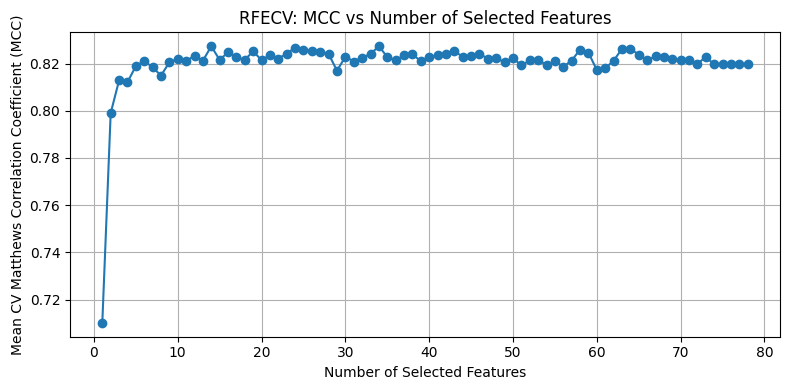

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(
    range(1, len(rfecv.cv_results_["mean_test_score"]) + 1),
    rfecv.cv_results_["mean_test_score"],
    marker='o'
)
plt.title("RFECV: MCC vs Number of Selected Features")
plt.xlabel("Number of Selected Features")
plt.ylabel("Mean CV Matthews Correlation Coefficient (MCC)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def objective(trial):
    # Подбор гиперпараметров
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.5, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 30),
        'num_leaves': trial.suggest_int('num_leaves', 5, 50),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'random_state': 42,
        'n_jobs': -1
    }


    model = LGBMClassifier(**param, verbose = -1, is_unbalance=True)


    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train[LGBM_sel_features], y_train, cv=cv, scoring='f1')


    return scores.mean()

In [ ]:
study_1 = optuna.create_study(direction='maximize')
study_1.optimize(objective, n_trials=100)

print("Лучшие гиперпараметры:")
print(study_1.best_params)

In [ ]:
LGBM_model = LGBMClassifier(
    n_estimators=87,
    learning_rate=0.12459678554508243,
    max_depth=16,
    num_leaves=50,
    min_child_samples=16,
    subsample=0.6045966685118891,
    colsample_bytree=0.65173420001114,
    reg_alpha=0.0012096106630694842,
    reg_lambda=0.00034999220387409266,
    class_weight=None,
    boosting_type='gbdt', verbose = -1
)
LGBM_model.fit(X_train[LGBM_sel_features], y_train)

# Оценка на тестовой выборке
y_pred = LGBM_model.predict(X_test[LGBM_sel_features])
print("f1 на тесте:", f1_score(y_test, y_pred))

f1 на тесте: 0.8117647058823528


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(LGBM_model, X_train[LGBM_sel_features], y_train, cv=skf, scoring='f1')
for i in range(5):
  print(f'Fold {i+1}: f1 = {scores[i]}')
print('Mean f1:', scores.mean())

Fold 1: f1 = 0.854779411764706
Fold 2: f1 = 0.8284132841328414
Fold 3: f1 = 0.813528336380256
Fold 4: f1 = 0.8318264014466545
Fold 5: f1 = 0.8296703296703296
Mean f1: 0.8316435526789576


RandonForest

In [ ]:
RF_model = RandomForestClassifier(random_state = 42)

cv = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

rfecv = RFECV(estimator=RF_model, step=10, cv=cv, scoring='f1', verbose=1)
rfecv.fit(X_train, y_train)

print("Оптимальное количество признаков:", rfecv.n_features_)
print("Выбранные признаки:", X_train.columns[rfecv.support_].tolist())
RF_sel_features = X_train.columns[rfecv.support_].tolist()

In [ ]:
RF_sel_features = ['emb_3', 'emb_4', 'emb_11', 'emb_15', 'emb_22', 'emb_23', 'emb_27', 'emb_28', 'emb_30', 'emb_33', 'emb_34', 'emb_41', 'emb_43', 'emb_48', 'emb_53', 'emb_56', 'emb_61', 'emb_65', 'emb_66', 'emb_82', 'emb_91', 'emb_100', 'emb_102', 'emb_108', 'emb_116', 'emb_117', 'emb_118', 'emb_120', 'emb_122', 'emb_126', 'emb_129', 'emb_132', 'emb_148', 'emb_150', 'emb_154', 'emb_157', 'emb_170', 'emb_180', 'emb_188', 'emb_190', 'emb_217', 'emb_226', 'emb_238', 'emb_243', 'emb_268', 'emb_269', 'emb_270', 'emb_285', 'emb_288', 'emb_295', 'emb_298', 'emb_300', 'emb_311', 'emb_315', 'emb_323', 'emb_326', 'emb_329', 'emb_333', 'emb_347', 'emb_348', 'emb_349', 'emb_354', 'emb_358', 'emb_363', 'emb_380', 'emb_384', 'emb_386', 'emb_393', 'emb_400', 'emb_402', 'emb_405', 'emb_411', 'emb_413', 'emb_414', 'emb_416', 'emb_433', 'emb_434', 'emb_437', 'emb_438', 'emb_454', 'emb_456', 'emb_462', 'emb_463', 'emb_473', 'emb_474', 'emb_479', 'emb_481', 'emb_484', 'emb_485', 'emb_486', 'emb_487', 'emb_488', 'emb_498', 'emb_502', 'emb_504', 'emb_505', 'emb_508', 'emb_509', 'emb_512', 'emb_514', 'emb_516', 'emb_517', 'emb_538', 'emb_541', 'emb_549', 'emb_550', 'emb_552', 'emb_553', 'emb_554', 'emb_560', 'emb_567', 'emb_569', 'emb_578', 'emb_581', 'emb_586', 'emb_596', 'emb_597', 'emb_616', 'emb_623', 'emb_629', 'emb_631', 'emb_641', 'emb_652', 'emb_654', 'emb_661', 'emb_699', 'emb_706', 'emb_711', 'emb_721', 'emb_726', 'emb_738', 'emb_741', 'emb_749', 'emb_752', 'emb_753', 'emb_757', 'emb_760', 'emb_766']
len(RF_sel_features)

138

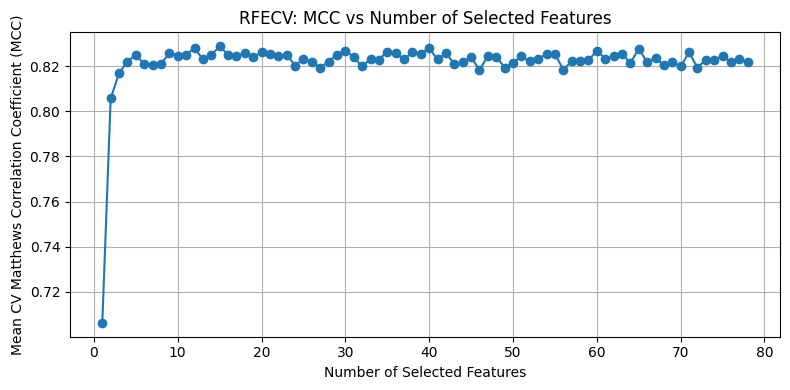

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(
    range(1, len(rfecv.cv_results_["mean_test_score"]) + 1),
    rfecv.cv_results_["mean_test_score"],
    marker='o'
)
plt.title("RFECV: MCC vs Number of Selected Features")
plt.xlabel("Number of Selected Features")
plt.ylabel("Mean CV Matthews Correlation Coefficient (MCC)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 2, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample']),
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestClassifier(**param)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train[RF_sel_features], y_train, cv=cv, scoring='f1')

    return scores.mean()

In [ ]:
study_2 = optuna.create_study(direction='maximize')
study_2.optimize(objective, n_trials=100)

print("Лучшие гиперпараметры:")
print(study_2.best_params)

In [ ]:
RF_model = RandomForestClassifier(
    n_estimators=192,
    max_depth=12,
    min_samples_split=16,
    min_samples_leaf=11,
    max_features='log2',
    bootstrap=False,
    class_weight=None
)
RF_model.fit(X_train[RF_sel_features], y_train)

# Оценка на тестовой выборке
y_pred = RF_model.predict(X_test[RF_sel_features])
print("f1 на тесте:", f1_score(y_test, y_pred))

f1 на тесте: 0.8194842406876791


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(RF_model, X_train[RF_sel_features], y_train, cv=skf, scoring='f1')
for i in range(5):
  print(f'Fold {i+1}: f1 = {scores[i]}')
print('Mean f1:', scores.mean())

Fold 1: f1 = 0.8467815049864007
Fold 2: f1 = 0.8263254113345521
Fold 3: f1 = 0.8255395683453237
Fold 4: f1 = 0.8266666666666668
Fold 5: f1 = 0.8234217749313815
Mean f1: 0.8297469852528649


Final metrics comparison

In [ ]:
models = [LGBM_model, RF_model]
models_names = ['LGBM', 'Random_Forest']
selected_features_list = [LGBM_sel_features, RF_sel_features]

def get_metrics(models_list, models_names, selected_features_list):
  roc_auc_metrics = []
  f1_score_metrics = []
  f1_macro_metrics = []
  f1_micro_metrics = []
  precision_metrics = []
  recall_metrics = []
  mcc_metrics = []
  FP = []
  FN = []
  TP = []
  TN = []

  for model, features in zip(models_list, selected_features_list):
    
    y_proba = model.predict_proba(X_test[features])[:, 1]
    y_pred = model.predict(X_test[features])

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    roc_auc_metrics.append(roc_auc_score(y_test, y_proba))
    f1_score_metrics.append(f1_score(y_test, y_pred))
    f1_macro_metrics.append(f1_score(y_test, y_pred, average='macro'))  
    f1_micro_metrics.append(f1_score(y_test, y_pred, average='micro'))
    precision_metrics.append(precision_score(y_test, y_pred))
    recall_metrics.append(recall_score(y_test, y_pred))
    mcc_metrics.append(matthews_corrcoef(y_test, y_pred))
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    TP.append(tp)

  data = pd.DataFrame({
    'model': models_names,
    'roc/auc': roc_auc_metrics,
    'f1': f1_score_metrics,
    'f1 (macro)': f1_macro_metrics,
    'f1 (micro)': f1_micro_metrics,
    'precision': precision_metrics,
    'recall': recall_metrics,
    'mcc': mcc_metrics,
    'TN': TN,
    'FP': FP,
    'FN': FN,
    'TP': TP
    })

  return data

In [23]:
results = get_metrics(models, models_names, selected_features_list)
results

,model,roc/auc,f1,f1 (macro),f1 (micro),precision,recall,mcc,TN,FP,FN,TP
0,LGBM,0.836606,0.818516,0.767467,0.778674,0.822747,0.814327,0.534999,312,120,127,557
1,Random_Forest,0.837354,0.819554,0.760550,0.775090,0.806223,0.833333,0.521819,295,137,114,570
